In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Reading File

win=pd.read_excel(r"C:\Users\yashwant.tahiliani\Downloads\WinPrediction\Win Prediction\Win_Prediction_Data.xlsx")

# Data cleaning

In [98]:
win.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal_Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [99]:
win.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal_Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


(array([8.676e+03, 8.440e+02, 2.640e+02, 9.900e+01, 6.700e+01, 1.400e+01,
        2.700e+01, 1.600e+01, 1.000e+01, 8.000e+00, 8.000e+00, 3.000e+00,
        2.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([       0.   ,  1225490.196,  2450980.392,  3676470.588,
         4901960.784,  6127450.98 ,  7352941.176,  8578431.372,
         9803921.568, 11029411.764, 12254901.96 , 13480392.156,
        14705882.352, 15931372.548, 17156862.744, 18382352.94 ,
        19607843.136, 20833333.332, 22058823.528, 23284313.724,
        24509803.92 , 25735294.116, 26960784.312, 28186274.508,
        29411764.704, 30637254.9  , 31862745.096, 33088235.292,
        34313725.488, 35539215.684, 36764705.88 ]),
 <BarContainer object of 30 artists>)

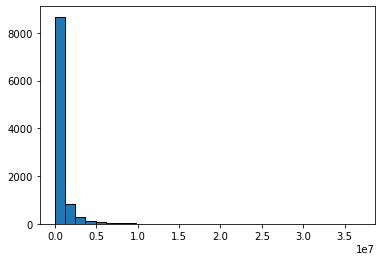

In [100]:
plt.hist(win.Deal_Cost, bins = 30, edgecolor = 'k')

In [101]:
win=win.rename(columns=({"Client Category":"client_category","Solution Type":"solution_type","Deal Date":"deal_date","VP Name":"vp_name","Manager Name":"manager_name","Deal Cost":"deal_cost","Deal Status Code":"deal_status"}))

In [102]:
win["combination"]=win["vp_name"]+win["manager_name"]

In [103]:
win.head()

,client_category,solution_type,deal_date,Sector,Location,vp_name,manager_name,Deal_Cost,deal_status,combination
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,Ekta ZutshiGopa Trilochana
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,Ekta ZutshiGopa Trilochana
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Ekta ZutshiRussell Dahlen
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Ekta ZutshiRussell Dahlen
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,Ekta ZutshiRussell Dahlen


In [104]:
#Replacing with Mode (Others)
win=win.fillna("others")

#Dropping deal_date column as per analysis in Tableau. (Non-significant)
win=win.drop("deal_date",axis=1)

In [105]:
win.head()

,client_category,solution_type,Sector,Location,vp_name,manager_name,Deal_Cost,deal_status,combination
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,Ekta ZutshiGopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,Ekta ZutshiGopa Trilochana
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Ekta ZutshiRussell Dahlen
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Ekta ZutshiRussell Dahlen
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,Ekta ZutshiRussell Dahlen


## Data Preparation


In [106]:
win.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_category  10061 non-null  object 
 1   solution_type    10061 non-null  object 
 2   Sector           10061 non-null  object 
 3   Location         10061 non-null  object 
 4   vp_name          10061 non-null  object 
 5   manager_name     10061 non-null  object 
 6   Deal_Cost        10061 non-null  float64
 7   deal_status      10061 non-null  object 
 8   combination      10061 non-null  object 
dtypes: float64(1), object(8)
memory usage: 707.5+ KB


In [107]:
deal_log=np.log(win.Deal_Cost+1)

win=pd.concat([win,deal_log],axis=1)

win.head()

,client_category,solution_type,Sector,Location,vp_name,manager_name,Deal_Cost,deal_status,combination,Deal_Cost
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,Ekta ZutshiGopa Trilochana,11.918397
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,Ekta ZutshiGopa Trilochana,13.520746
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Ekta ZutshiRussell Dahlen,11.002117
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Ekta ZutshiRussell Dahlen,11.002117
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,Ekta ZutshiRussell Dahlen,11.300763


In [109]:
win=win.rename(columns=({win.columns[9]:"deal_log"}))

win.head()  #same names for two columns

l1=list(win.columns)

l1[9]="deal_cost_log"

win.columns=l1

In [11]:
win.head()

,client_category,solution_type,Sector,Location,vp_name,manager_name,deal_log,deal_status,combination,deal_cost_log
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,Ekta ZutshiGopa Trilochana,11.918397
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,Ekta ZutshiGopa Trilochana,13.520746
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Ekta ZutshiRussell Dahlen,11.002117
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Ekta ZutshiRussell Dahlen,11.002117
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,Ekta ZutshiRussell Dahlen,11.300763


(array([2.460e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.540e+02, 6.000e+00, 2.000e+00, 1.600e+01, 3.300e+01, 7.400e+01,
        1.970e+02, 5.260e+02, 1.354e+03, 2.264e+03, 2.120e+03, 1.441e+03,
        9.330e+02, 4.140e+02, 1.730e+02, 6.100e+01, 2.800e+01, 1.500e+01]),
 array([ 0.        ,  0.5806683 ,  1.16133659,  1.74200489,  2.32267319,
         2.90334148,  3.48400978,  4.06467807,  4.64534637,  5.22601467,
         5.80668296,  6.38735126,  6.96801956,  7.54868785,  8.12935615,
         8.71002445,  9.29069274,  9.87136104, 10.45202933, 11.03269763,
        11.61336593, 12.19403422, 12.77470252, 13.35537082, 13.93603911,
        14.51670741, 15.09737571, 15.678044  , 16.2587123 , 16.83938059,
        17.42004889]),
 <BarContainer object of 30 artists>)

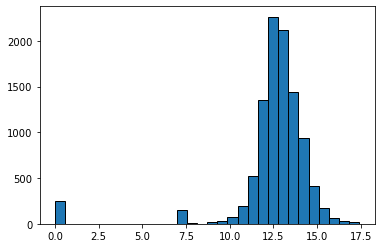

In [110]:
plt.hist(win.deal_cost_log, bins = 30, edgecolor = 'k')

## Data  Frame to Store Labels Before applying Label Encoder

In [12]:
vp_manager_info=win

In [13]:
vp_manager_info.head()

,client_category,solution_type,Sector,Location,vp_name,manager_name,deal_log,deal_status,combination,deal_cost_log
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,Ekta ZutshiGopa Trilochana,11.918397
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,Ekta ZutshiGopa Trilochana,13.520746
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Ekta ZutshiRussell Dahlen,11.002117
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Ekta ZutshiRussell Dahlen,11.002117
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,Ekta ZutshiRussell Dahlen,11.300763


In [14]:
win=win.drop("vp_name",axis=1)
win=win.drop("manager_name",axis=1)
win=win.drop("deal_log",axis=1)

In [15]:
win.head()

,client_category,solution_type,Sector,Location,deal_status,combination,deal_cost_log
0,Telecom,Solution 7,Sector 24,L5,Won,Ekta ZutshiGopa Trilochana,11.918397
1,Telecom,Solution 7,Sector 24,L5,Won,Ekta ZutshiGopa Trilochana,13.520746
2,Internal,Solution 59,Sector 20,Others,Lost,Ekta ZutshiRussell Dahlen,11.002117
3,Internal,Solution 59,Sector 20,Others,Lost,Ekta ZutshiRussell Dahlen,11.002117
4,Internal,Solution 32,Sector 20,Others,Lost,Ekta ZutshiRussell Dahlen,11.300763


In [16]:
l1=list(win.columns)

l1[5]="combination"

win.columns=l1

In [17]:
win.shape

(10061, 7)

# #Converting Non-numeric to Numeric

In [18]:
le=LabelEncoder()
win[win.select_dtypes(include="object").columns]=win[win.select_dtypes(include="object").columns].apply(le.fit_transform)

In [19]:
win.head()

,client_category,solution_type,Sector,Location,deal_status,combination,deal_cost_log
0,39,64,16,7,1,161,11.918397
1,39,64,16,7,1,161,13.520746
2,19,54,12,12,0,186,11.002117
3,19,54,12,12,0,186,11.002117
4,19,25,12,12,0,186,11.300763


In [20]:
vp_manager_info1 = [vp_manager_info["vp_name"], vp_manager_info["manager_name"], win["combination"]]

In [21]:
headers = ["vp_name","manager_name","combination"]

In [22]:
vp_manager_info1 = pd.concat(vp_manager_info1, axis=1, keys=headers)

In [23]:
vp_manager_info1

,vp_name,manager_name,combination
0,Ekta Zutshi,Gopa Trilochana,161
1,Ekta Zutshi,Gopa Trilochana,161
2,Ekta Zutshi,Russell Dahlen,186
3,Ekta Zutshi,Russell Dahlen,186
4,Ekta Zutshi,Russell Dahlen,186
...,...,...,...
10056,Rudraksh Sharma,Rudraksh Sharma,681
10057,Rudraksh Sharma,Sharavan Singh,683
10058,Rudraksh Sharma,Rudraksh Sharma,681
10059,Man Suddeth,Cleotilde Biron,453


In [24]:
vp_manager_info2=vp_manager_info1.drop_duplicates()

In [25]:
vp_manager_info3=vp_manager_info2.sort_values(by=['combination'])

In [26]:
vp_manager_info3

,vp_name,manager_name,combination
4435,Alam Syed,Abhinav Warrier,0
4461,Alam Syed,Alam Syed,1
3536,Alam Syed,Darin Vath,2
5212,Alam Syed,Deepak Chandra Prakash,3
4732,Alam Syed,Dennis Faux,4
...,...,...,...
3828,som dutt,mohd khairul,955
1225,som dutt,nahar singh,956
5630,som dutt,ram dutt gupta,957
7543,som dutt,sheak shakir,958


# Random Sampling

In [27]:
win_x=win.drop("deal_status",axis=1)

train_x,test_x,train_y,test_y=train_test_split(win_x,win.deal_status,test_size=0.3,random_state=555)

In [28]:
win.deal_cost_log.value_counts()

12.591739    508
13.284884    390
12.997202    377
11.898595    363
0.000000     246
            ... 
12.567446      1
12.935327      1
15.095218      1
13.995379      1
15.007649      1
Name: deal_cost_log, Length: 1469, dtype: int64

# #Model building

In [29]:
#RF Classifier
rfc = RandomForestClassifier()
rfc.fit(train_x , train_y)
pred_rfc=rfc.predict(test_x)

In [30]:
# Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

accu_rfc=confusion_matrix(pred_rfc,test_y)
print("Confusion matrix for RF model is")
print("{}".format(confusion_matrix(pred_rfc,test_y)))
print("Accuracy for RF model is        {}".format(accuracy_score(pred_rfc,test_y)))
print("Precision for RF model is       {}".format(precision_score(pred_rfc,test_y)))
print("F1 Score for RF model is        {}".format(f1_score(pred_rfc,test_y)))
print("AU-ROC Score for RF model is    {}".format(roc_auc_score(pred_rfc,test_y)))

Confusion matrix for RF model is
[[1742  461]
 [ 142  674]]
Accuracy for RF model is        0.8002649884067572
Precision for RF model is       0.5938325991189427
F1 Score for RF model is        0.6909277293695542
AU-ROC Score for RF model is    0.8083601461465202


In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
pred_rfc_prob=rfc.predict_proba(test_x)
pred_rfc_prob

array([[0.93, 0.07],
       [0.3 , 0.7 ],
       [0.91, 0.09],
       ...,
       [0.97, 0.03],
       [0.91, 0.09],
       [0.8 , 0.2 ]])

In [32]:
fpr,tpr,threshold=roc_curve(test_y,pred_rfc_prob[:,1])

In [33]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00106157, 0.00106157, 0.00106157, 0.00106157, 0.00212314,
       0.00212314, 0.00212314, 0.00212314, 0.00212314, 0.00212314,
       0.00212314, 0.00424628, 0.00424628, 0.007431  , 0.007431  ,
       0.007431  , 0.007431  , 0.007431  , 0.007431  , 0.007431  ,
       0.007431  , 0.007431  , 0.007431  , 0.00849257, 0.00849257,
       0.01273885, 0.01273885, 0.01380042, 0.01380042, 0.01380042,
       0.014862  , 0.014862  , 0.014862  , 0.01592357, 0.01698514,
       0.01698514, 0.01804671, 0.01910828, 0.01910828, 0.02016985,
       0.02016985, 0.02229299, 0.02229299, 0.02441614, 0.02547771,
       0.02760085, 0.02760085, 0.02866242, 0.02866242, 0.03078556,
       0.0329087 , 0.0329087 , 0.03397028, 0.03715499, 0.04352442,
       0.04352442, 0.04352442, 0.04352442, 0.04458599, 0.04458599,
       0.04511677, 0.04511677, 0.04617834, 0.04936306, 0.04936306,
       0.05042463, 0.05042463, 0.0514862 , 0.05254777, 0.05254

In [34]:
tpr

array([0.        , 0.00792952, 0.0123348 , 0.02290749, 0.02378855,
       0.04052863, 0.05286344, 0.06079295, 0.07048458, 0.0784141 ,
       0.08017621, 0.08986784, 0.09162996, 0.09955947, 0.1092511 ,
       0.11013216, 0.12070485, 0.12246696, 0.12951542, 0.13920705,
       0.14008811, 0.14801762, 0.15682819, 0.15770925, 0.16828194,
       0.169163  , 0.17973568, 0.18061674, 0.1938326 , 0.19471366,
       0.20352423, 0.20440529, 0.21938326, 0.22026432, 0.23524229,
       0.24581498, 0.24757709, 0.26167401, 0.26167401, 0.27753304,
       0.29251101, 0.30220264, 0.3154185 , 0.31718062, 0.31718062,
       0.32863436, 0.34537445, 0.34625551, 0.35242291, 0.35242291,
       0.36563877, 0.36740088, 0.37973568, 0.38325991, 0.39823789,
       0.40969163, 0.4123348 , 0.42202643, 0.42819383, 0.44052863,
       0.44229075, 0.45286344, 0.45374449, 0.46255507, 0.46343612,
       0.46343612, 0.46431718, 0.46431718, 0.48017621, 0.48105727,
       0.48986784, 0.4907489 , 0.4907489 , 0.50484581, 0.50572

In [35]:
import matplotlib.pyplot as plt

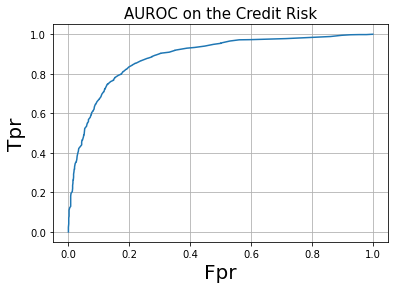

In [36]:
plt.plot (fpr, tpr)
plt.xlabel ("Fpr", size = 20)
plt.ylabel ("Tpr", size = 20)
plt.title("AUROC on the Credit Risk", size=15)
plt.grid()

# Other Evaluations

In [38]:
test_data = pd.DataFrame(test_x)
test_data=pd.concat([test_data, test_y.rename('deal_status_original')], axis=1)

In [39]:
test_data.head()

,client_category,solution_type,Sector,Location,combination,deal_cost_log,deal_status_original
1965,18,55,7,1,506,14.747096,0
1960,20,32,11,1,371,11.381085,1
7132,39,66,15,0,409,11.610915,0
2366,28,25,15,2,348,12.501814,1
4860,28,24,15,0,57,11.624160,0


In [40]:
pred_rfc_df=pd.DataFrame(pred_rfc)
pred_rfc_df.head()
test_data = pd.concat([test_data.reset_index(drop=True), pred_rfc_df], axis=1)

In [41]:
test_data.shape

(3019, 8)

In [42]:
test_data.head()

,client_category,solution_type,Sector,Location,combination,deal_cost_log,deal_status_original,0
0,18,55,7,1,506,14.747096,0,0
1,20,32,11,1,371,11.381085,1,1
2,39,66,15,0,409,11.610915,0,0
3,28,25,15,2,348,12.501814,1,1
4,28,24,15,0,57,11.624160,0,0


In [43]:
test_data.columns.values[-1]="as_predicted"

In [44]:
test_data.head()

,client_category,solution_type,Sector,Location,combination,deal_cost_log,deal_status_original,as_predicted
0,18,55,7,1,506,14.747096,0,0
1,20,32,11,1,371,11.381085,1,1
2,39,66,15,0,409,11.610915,0,0
3,28,25,15,2,348,12.501814,1,1
4,28,24,15,0,57,11.624160,0,0


In [46]:
pred_rfc_prob = pd.DataFrame(pred_rfc_prob)

In [47]:
test_data = pd.concat([test_data.reset_index(drop=True), pred_rfc_prob], axis=1)

In [48]:
test_data.head()

,client_category,solution_type,Sector,Location,combination,deal_cost_log,deal_status_original,as_predicted,0,1
0,18,55,7,1,506,14.747096,0,0,0.930000,0.070000
1,20,32,11,1,371,11.381085,1,1,0.300000,0.700000
2,39,66,15,0,409,11.610915,0,0,0.910000,0.090000
3,28,25,15,2,348,12.501814,1,1,0.378833,0.621167
4,28,24,15,0,57,11.624160,0,0,0.800000,0.200000


In [49]:
test_data.columns.values[-1]="win_prob"

In [50]:
test_data.columns.values[-2]="loss_prob"

In [51]:
test_data.head()

,client_category,solution_type,Sector,Location,combination,deal_cost_log,deal_status_original,as_predicted,loss_prob,win_prob
0,18,55,7,1,506,14.747096,0,0,0.930000,0.070000
1,20,32,11,1,371,11.381085,1,1,0.300000,0.700000
2,39,66,15,0,409,11.610915,0,0,0.910000,0.090000
3,28,25,15,2,348,12.501814,1,1,0.378833,0.621167
4,28,24,15,0,57,11.624160,0,0,0.800000,0.200000


In [52]:
test_data.shape

(3019, 10)

In [53]:
import math
test_data['deal_cost']=test_data.apply(lambda row:np.exp(row.deal_cost_log)-1,axis=1)

In [54]:
test_data.head()

,client_category,solution_type,Sector,Location,combination,deal_cost_log,deal_status_original,as_predicted,loss_prob,win_prob,deal_cost
0,18,55,7,1,506,14.747096,0,0,0.930000,0.070000,2538529.41
1,20,32,11,1,371,11.381085,1,1,0.300000,0.700000,87647.06
2,39,66,15,0,409,11.610915,0,0,0.910000,0.090000,110294.12
3,28,25,15,2,348,12.501814,1,1,0.378833,0.621167,268823.53
4,28,24,15,0,57,11.624160,0,0,0.800000,0.200000,111764.71


In [55]:
test_data['deal_costXwin_prob']=test_data.apply(lambda row:row.win_prob*row.deal_cost,axis=1)

In [56]:
test_data.head()

,client_category,solution_type,Sector,Location,combination,deal_cost_log,deal_status_original,as_predicted,loss_prob,win_prob,deal_cost,deal_costXwin_prob
0,18,55,7,1,506,14.747096,0,0,0.930000,0.070000,2538529.41,177697.058700
1,20,32,11,1,371,11.381085,1,1,0.300000,0.700000,87647.06,61352.942000
2,39,66,15,0,409,11.610915,0,0,0.910000,0.090000,110294.12,9926.470800
3,28,25,15,2,348,12.501814,1,1,0.378833,0.621167,268823.53,166984.216052
4,28,24,15,0,57,11.624160,0,0,0.800000,0.200000,111764.71,22352.942000


In [57]:
test_data_sum = test_data.groupby('combination', as_index=False).sum()

In [58]:
test_data_sum.head()

,combination,client_category,solution_type,Sector,Location,deal_cost_log,deal_status_original,as_predicted,loss_prob,win_prob,deal_cost,deal_costXwin_prob
0,1,4,63,8,1,15.587468,1,1,0.320,0.680,5882352.94,4.000000e+06
1,2,224,639,86,91,165.889472,8,12,3.095,9.905,10245588.26,8.194794e+06
2,3,31,213,29,0,54.876705,1,3,2.010,1.990,3829411.77,1.712235e+06
3,6,2,96,0,0,26.363666,2,2,0.220,1.780,1073529.41,9.683824e+05
4,7,12,99,24,3,41.307434,0,2,0.730,2.270,2882352.94,2.080588e+06


In [59]:
test_data_sum.shape

(703, 12)

In [60]:
test_data_sum['combination_prob']=test_data_sum.apply(lambda row:row.deal_costXwin_prob/row.deal_cost,axis=1)

<ipython-input-60-8aa68f491966>:1: RuntimeWarning: invalid value encountered in double_scalars
  test_data_sum['combination_prob']=test_data_sum.apply(lambda row:row.deal_costXwin_prob/row.deal_cost,axis=1)


In [61]:
test_data_sum.head()

,combination,client_category,solution_type,Sector,Location,deal_cost_log,deal_status_original,as_predicted,loss_prob,win_prob,deal_cost,deal_costXwin_prob,combination_prob
0,1,4,63,8,1,15.587468,1,1,0.320,0.680,5882352.94,4.000000e+06,0.680000
1,2,224,639,86,91,165.889472,8,12,3.095,9.905,10245588.26,8.194794e+06,0.799836
2,3,31,213,29,0,54.876705,1,3,2.010,1.990,3829411.77,1.712235e+06,0.447127
3,6,2,96,0,0,26.363666,2,2,0.220,1.780,1073529.41,9.683824e+05,0.902055
4,7,12,99,24,3,41.307434,0,2,0.730,2.270,2882352.94,2.080588e+06,0.721837


In [62]:
test_data_sum_comb = test_data_sum.merge(vp_manager_info3, on='combination', how='inner').fillna('')

In [63]:
test_data_sum_comb.head()

,combination,client_category,solution_type,Sector,Location,deal_cost_log,deal_status_original,as_predicted,loss_prob,win_prob,deal_cost,deal_costXwin_prob,combination_prob,vp_name,manager_name
0,1,4,63,8,1,15.587468,1,1,0.320,0.680,5882352.94,4.000000e+06,0.68,Alam Syed,Alam Syed
1,2,224,639,86,91,165.889472,8,12,3.095,9.905,10245588.26,8.194794e+06,0.799836,Alam Syed,Darin Vath
2,3,31,213,29,0,54.876705,1,3,2.010,1.990,3829411.77,1.712235e+06,0.447127,Alam Syed,Deepak Chandra Prakash
3,6,2,96,0,0,26.363666,2,2,0.220,1.780,1073529.41,9.683824e+05,0.902055,Alam Syed,Geoffrey Recker
4,7,12,99,24,3,41.307434,0,2,0.730,2.270,2882352.94,2.080588e+06,0.721837,Alam Syed,Johnna Lemay


In [64]:
test_data_sum_comb["combination_prob"] = pd.to_numeric(test_data_sum_comb.combination_prob, errors='coerce')

In [74]:
test_data_sum_comb_sort=test_data_sum_comb.sort_values(by='combination_prob', ascending=False)

In [77]:
print("Top five combination of VP & Manager \n", 
      test_data_sum_comb_sort[['vp_name','manager_name']].head(5))

Top five combination of VP & Manager 
             vp_name   manager_name
409     Molly Eakes  Randy Fontana
425    Rahul Bajpai    Akshay Gosh
15        Alam Syed  keshar ansari
623    Varsha Arora    Rahul Singh
247  Long Bergstrom   Ayusha Gupta


# Cost of False Prediction

In [78]:
test_data.head()

,client_category,solution_type,Sector,Location,combination,deal_cost_log,deal_status_original,as_predicted,loss_prob,win_prob,deal_cost,deal_costXwin_prob
0,18,55,7,1,506,14.747096,0,0,0.930000,0.070000,2538529.41,177697.058700
1,20,32,11,1,371,11.381085,1,1,0.300000,0.700000,87647.06,61352.942000
2,39,66,15,0,409,11.610915,0,0,0.910000,0.090000,110294.12,9926.470800
3,28,25,15,2,348,12.501814,1,1,0.378833,0.621167,268823.53,166984.216052
4,28,24,15,0,57,11.624160,0,0,0.800000,0.200000,111764.71,22352.942000


In [79]:
test_data['false_pred']=test_data.apply(lambda row:"False" if row.deal_status_original == row.as_predicted else "True",axis=1)

In [80]:
test_data.head()

,client_category,solution_type,Sector,Location,combination,deal_cost_log,deal_status_original,as_predicted,loss_prob,win_prob,deal_cost,deal_costXwin_prob,false_pred
0,18,55,7,1,506,14.747096,0,0,0.930000,0.070000,2538529.41,177697.058700,False
1,20,32,11,1,371,11.381085,1,1,0.300000,0.700000,87647.06,61352.942000,False
2,39,66,15,0,409,11.610915,0,0,0.910000,0.090000,110294.12,9926.470800,False
3,28,25,15,2,348,12.501814,1,1,0.378833,0.621167,268823.53,166984.216052,False
4,28,24,15,0,57,11.624160,0,0,0.800000,0.200000,111764.71,22352.942000,False


In [81]:
cost_of_false_pred=test_data[test_data["false_pred"]== "True"].sum()["deal_cost"]/test_data[test_data["false_pred"]== "True"].count()["deal_cost"]

In [87]:
print("Cost of False Prediction = \n", 
      np.round(cost_of_false_pred,2))

Cost of False Prediction = 
 648502.1
